<a href="https://colab.research.google.com/github/shettyshrey/communication-coach/blob/main/forecasting_model65_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will open a file picker dialog
df = pd.read_csv('green_taxi_data.csv')

Saving green_taxi_data.csv to green_taxi_data.csv


In [ ]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'duration',
       'time_only', 'duration_minutes', 'pickup_hour', 'time_desc'],
      dtype='object')

In [ ]:
df.groupby(['PULocationID']).agg('count')['VendorID']

,VendorID
PULocationID,
1,1
3,6
4,8
7,3072
8,2
...,...
261,13
262,24
263,215


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

def prepare_time_series_data(df, location_id):
    df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
    location_data = df[df['PULocationID'] == location_id].copy()
    hourly_demand = location_data.set_index('lpep_pickup_datetime').resample('H').size()

    return hourly_demand

def train_arima_model(data, order=(1,1,1)):
    model = SARIMAX(data,
                    order=order,
                    seasonal_order=(1,1,1,24))

    fitted_model = model.fit(disp=0)
    return fitted_model

def forecast_demand(model, steps=24):
    forecast = model.forecast(steps=steps)
    return forecast

def evaluate_model(actual, predicted):
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(actual - predicted))

    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    }

def create_location_forecast(df, location_id):
    time_series = prepare_time_series_data(df, location_id)

    train_size = int(len(time_series) * 0.8)
    train = time_series[:train_size]
    test = time_series[train_size:]

    model = train_arima_model(train)

    forecast = forecast_demand(model, len(test))

    metrics = evaluate_model(test, forecast)

    return {
        'model': model,
        'forecast': forecast,
        'metrics': metrics,
        'test_actual': test
    }

def analyze_multiple_locations(df, location_ids):
    results = {}

    for location_id in location_ids:
        print(f"Processing location {location_id}...")
        results[location_id] = create_location_forecast(df, location_id)

    return results

def run_demand_forecast(df):
    locations = df['PULocationID'].unique()[:5]

    results = analyze_multiple_locations(df, locations)

    for location_id, result in results.items():
        print(f"\nResults for Location {location_id}:")
        print("Error Metrics:")
        for metric, value in result['metrics'].items():
            print(f"{metric}: {value:.2f}")

        future_forecast = forecast_demand(result['model'])
        print("\nNext 24 hours forecast:")
        print(future_forecast)

    return results

In [ ]:
df = df[df['PULocationID'] == 65]

In [ ]:
run_demand_forecast(df)

Processing location 65...

Results for Location 65:
Error Metrics:
MSE: 2.39
RMSE: 1.55
MAE: 1.05

Next 24 hours forecast:
2024-08-07 08:00:00    0.517964
2024-08-07 09:00:00    1.048204
2024-08-07 10:00:00    2.405279
2024-08-07 11:00:00    2.068190
2024-08-07 12:00:00    3.492591
2024-08-07 13:00:00    1.935970
2024-08-07 14:00:00    3.032660
2024-08-07 15:00:00    2.671707
2024-08-07 16:00:00    3.455828
2024-08-07 17:00:00    6.032378
2024-08-07 18:00:00    6.556474
2024-08-07 19:00:00    5.370676
2024-08-07 20:00:00    2.519704
2024-08-07 21:00:00    1.475111
2024-08-07 22:00:00    0.857967
2024-08-07 23:00:00    0.756410
2024-08-08 00:00:00    0.488796
2024-08-08 01:00:00    0.198168
2024-08-08 02:00:00    0.171862
2024-08-08 03:00:00    0.045778
2024-08-08 04:00:00   -0.006480
2024-08-08 05:00:00   -0.007975
2024-08-08 06:00:00    0.008112
2024-08-08 07:00:00    0.374164
Freq: h, Name: predicted_mean, dtype: float64


{65: {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x785086003df0>,
  'forecast': 2024-08-07 08:00:00    0.517964
  2024-08-07 09:00:00    1.048204
  2024-08-07 10:00:00    2.405279
  2024-08-07 11:00:00    2.068190
  2024-08-07 12:00:00    3.492591
                           ...   
  2024-08-31 17:00:00    5.922806
  2024-08-31 18:00:00    6.325331
  2024-08-31 19:00:00    5.288971
  2024-08-31 20:00:00    2.697387
  2024-08-31 21:00:00    1.402007
  Freq: h, Name: predicted_mean, Length: 590, dtype: float64,
  'metrics': {'MSE': 2.387869449652601,
   'RMSE': 1.5452732605117456,
   'MAE': 1.0479921799169816},
  'test_actual': lpep_pickup_datetime
  2024-08-07 08:00:00    0
  2024-08-07 09:00:00    0
  2024-08-07 10:00:00    0
  2024-08-07 11:00:00    1
  2024-08-07 12:00:00    5
                        ..
  2024-08-31 17:00:00    0
  2024-08-31 18:00:00    5
  2024-08-31 19:00:00    0
  2024-08-31 20:00:00    1
  2024-08-31 21:00:00    2
  Freq: h, Length: 590

Processing location 65...

Results for Location 65:
Error Metrics:
MSE: 2.39
RMSE: 1.55
MAE: 1.05

Next 24 hours forecast:
2024-08-07 08:00:00    0.517964
2024-08-07 09:00:00    1.048204
2024-08-07 10:00:00    2.405279
2024-08-07 11:00:00    2.068190
2024-08-07 12:00:00    3.492591
2024-08-07 13:00:00    1.935970
2024-08-07 14:00:00    3.032660
2024-08-07 15:00:00    2.671707
2024-08-07 16:00:00    3.455828
2024-08-07 17:00:00    6.032378
2024-08-07 18:00:00    6.556474
2024-08-07 19:00:00    5.370676
2024-08-07 20:00:00    2.519704
2024-08-07 21:00:00    1.475111
2024-08-07 22:00:00    0.857967
2024-08-07 23:00:00    0.756410
2024-08-08 00:00:00    0.488796
2024-08-08 01:00:00    0.198168
2024-08-08 02:00:00    0.171862
2024-08-08 03:00:00    0.045778
2024-08-08 04:00:00   -0.006480
2024-08-08 05:00:00   -0.007975
2024-08-08 06:00:00    0.008112
2024-08-08 07:00:00    0.374164
Freq: h, Name: predicted_mean, dtype: float64


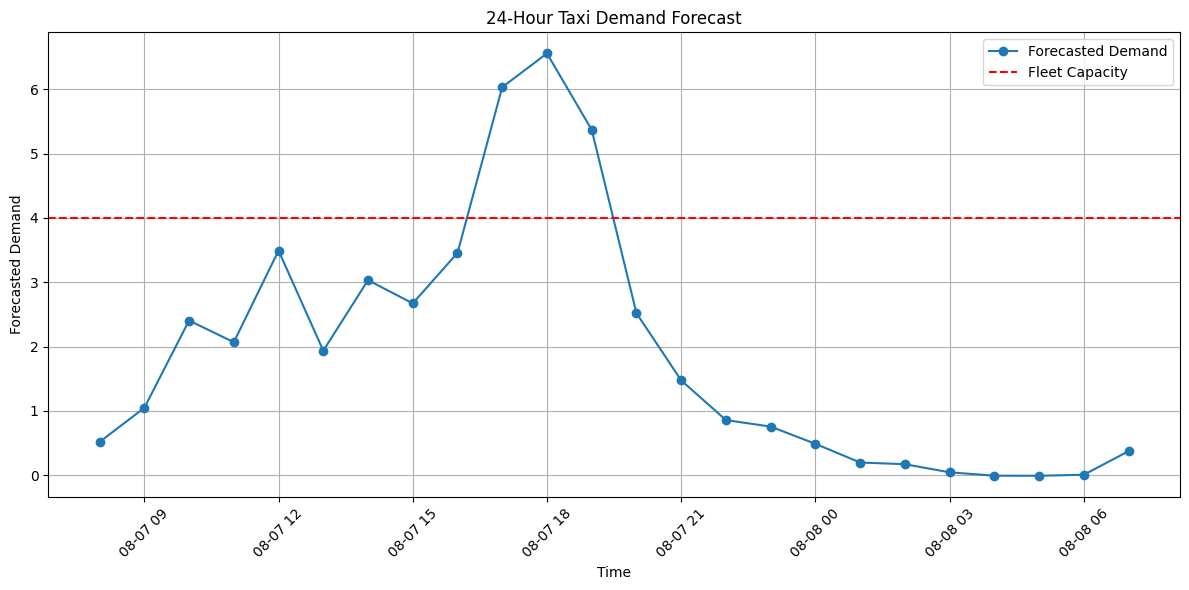

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'results' is the variable holding the output of 'run_demand_forecast'
# and you want to plot for location ID 65
location_id = 65  # Replace with the desired location ID
results = run_demand_forecast(df)  # Assuming 'df' is already defined and preprocessed

# Extract the forecast for the desired location
forecast = results[location_id]['forecast']

# Extract the 24-hour forecast from the data
forecast_24hr = forecast['2024-08-07 08:00:00':'2024-08-08 07:00:00']

# Plot the 24-hour forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_24hr.index, forecast_24hr.values, marker='o', linestyle='-', label='Forecasted Demand')
plt.axhline(y=4, color='red', linestyle='--', label='Fleet Capacity')  # Example of fleet capacity
plt.title("24-Hour Taxi Demand Forecast")
plt.xlabel("Time")
plt.ylabel("Forecasted Demand")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

def evaluate_service_levels(forecasted_demand, fleet_capacity):
    """
    Compare forecasted demand with current fleet capacity to calculate unmet demand
    and propose solutions for resource allocation.

    Parameters:
    forecasted_demand (pd.Series): Hourly or daily forecasted demand for taxis.
    fleet_capacity (int): The current number of taxis available.

    Returns:
    pd.DataFrame: A table showing forecasted demand, unmet demand, and recommendations.
    """
    # Create a DataFrame to store results
    evaluation = pd.DataFrame({
        'Forecasted_Demand': forecasted_demand,
        'Fleet_Capacity': [fleet_capacity] * len(forecasted_demand)  # Assuming constant fleet capacity
    })

    # Calculate unmet demand
    evaluation['Unmet_Demand'] = evaluation['Forecasted_Demand'] - evaluation['Fleet_Capacity']
    evaluation['Unmet_Demand'] = evaluation['Unmet_Demand'].apply(lambda x: max(0, x))  # Unmet demand cannot be negative

    # Add recommendations
    evaluation['Recommendation'] = evaluation['Unmet_Demand'].apply(
        lambda x: "Deploy Additional Taxis" if x > 0 else "Capacity Sufficient"
    )

    return evaluation

# Example usage for time range 5 PM to 7 PM
forecasted_demand = pd.Series(
    [6.0, 5.0],  # Forecasted demand for 5 PM and 6 PM
    index=pd.date_range('2024-08-07 17:00', periods=2, freq='H')  # Time range 5 PM to 7 PM
)
fleet_capacity = 4  # Example fleet capacity

# Evaluate service levels for the specified time range
service_levels = evaluate_service_levels(forecasted_demand, fleet_capacity)
print(service_levels)



                     Forecasted_Demand  Fleet_Capacity  Unmet_Demand  \
2024-08-07 17:00:00                6.0               4           2.0   
2024-08-07 18:00:00                5.0               4           1.0   

                              Recommendation  
2024-08-07 17:00:00  Deploy Additional Taxis  
2024-08-07 18:00:00  Deploy Additional Taxis  


In [ ]:
# Filter the data to show only peak periods with unmet demand
peak_periods = service_levels[service_levels['Unmet_Demand'] > 0]
print(peak_periods)



                     Forecasted_Demand  Fleet_Capacity  Unmet_Demand  \
2024-08-07 17:00:00                6.0               4           2.0   
2024-08-07 18:00:00                5.0               4           1.0   

                              Recommendation  
2024-08-07 17:00:00  Deploy Additional Taxis  
2024-08-07 18:00:00  Deploy Additional Taxis  


In [ ]:
# Calculate additional taxis required
peak_periods['Extra_Taxis_Required'] = peak_periods['Unmet_Demand']
print(peak_periods[['Forecasted_Demand', 'Fleet_Capacity', 'Unmet_Demand', 'Extra_Taxis_Required']])


                     Forecasted_Demand  Fleet_Capacity  Unmet_Demand  \
2024-08-07 17:00:00                6.0               4           2.0   
2024-08-07 18:00:00                5.0               4           1.0   

                     Extra_Taxis_Required  
2024-08-07 17:00:00                   2.0  
2024-08-07 18:00:00                   1.0  


In [ ]:
# Create a deployment plan
deployment_plan = peak_periods[['Forecasted_Demand', 'Fleet_Capacity', 'Extra_Taxis_Required']]
deployment_plan.rename(columns={'Fleet_Capacity': 'Base_Fleet'}, inplace=True)
print(deployment_plan)


                     Forecasted_Demand  Base_Fleet  Extra_Taxis_Required
2024-08-07 17:00:00                6.0           4                   2.0
2024-08-07 18:00:00                5.0           4                   1.0


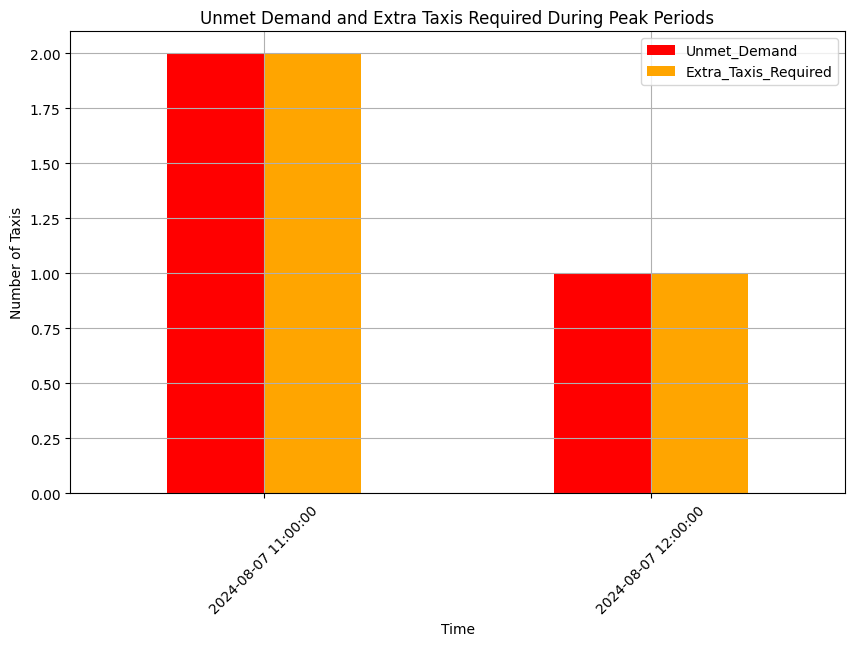

In [ ]:
import matplotlib.pyplot as plt

# Plot unmet demand and extra taxis required
peak_periods[['Unmet_Demand', 'Extra_Taxis_Required']].plot(kind='bar', figsize=(10, 6), color=['red', 'orange'])
plt.title("Unmet Demand and Extra Taxis Required During Peak Periods")
plt.xlabel("Time")
plt.ylabel("Number of Taxis")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
# Filter data for Location ID 65
location_id = 65
filtered_data = df[df['PULocationID'] == location_id]

# Calculate dynamic revenue per ride (average fare amount)
if 'fare_amount' in filtered_data.columns:
    revenue_per_ride = filtered_data['fare_amount'].mean()
else:
    revenue_per_ride = 10  # Default to $10 if fare_amount is not in the dataset

# Calculate dynamic cost per taxi per hour based on average duration
if 'duration_minutes' in filtered_data.columns:
    cost_per_taxi_per_hour = (filtered_data['duration_minutes'].mean() / 60) * 15
else:
    cost_per_taxi_per_hour = 15  # Default to $15/hour if duration data is missing

# Define unmet demand penalty (assumed industry standard if not available in the data)
unmet_demand_penalty = 20  # $20 per unmet ride

# Calculate costs for additional taxis
peak_periods['Additional_Taxi_Cost'] = peak_periods['Extra_Taxis_Required'] * cost_per_taxi_per_hour

# Calculate unmet demand cost
peak_periods['Unmet_Demand_Cost'] = peak_periods['Unmet_Demand'] * unmet_demand_penalty

# Estimate total cost and revenue
peak_periods['Potential_Revenue'] = peak_periods['Forecasted_Demand'] * revenue_per_ride

# Calculate net profit
peak_periods['Net_Profit'] = peak_periods['Potential_Revenue'] - (peak_periods['Additional_Taxi_Cost'] + peak_periods['Unmet_Demand_Cost'])

# Display results
print(f"Dynamic Revenue per Ride: {revenue_per_ride:.2f}")
print(f"Dynamic Cost per Taxi per Hour: {cost_per_taxi_per_hour:.2f}")
print(peak_periods[['Forecasted_Demand', 'Extra_Taxis_Required', 'Additional_Taxi_Cost',
                    'Unmet_Demand_Cost', 'Potential_Revenue', 'Net_Profit']])



Dynamic Revenue per Ride: 20.52
Dynamic Cost per Taxi per Hour: 7.64
                     Forecasted_Demand  Extra_Taxis_Required  \
2024-08-07 11:00:00                6.0                   2.0   
2024-08-07 12:00:00                5.0                   1.0   

                     Additional_Taxi_Cost  Unmet_Demand_Cost  \
2024-08-07 11:00:00             15.285876               40.0   
2024-08-07 12:00:00              7.642938               20.0   

                     Potential_Revenue  Net_Profit  
2024-08-07 11:00:00         123.125430   67.839554  
2024-08-07 12:00:00         102.604525   74.961587  
